In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
from pathlib import Path
csvpath = Path("../Project 2/Resources/BTC_USD.csv.csv")
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-07-19,BTC,30940.287284,31785.840649,31875.639798,30426.882246
2021-07-20,BTC,29608.597253,30843.897108,31053.388150,29306.768628
2021-07-21,BTC,32014.436034,29807.024554,32815.741969,29514.516173
2021-07-22,BTC,32203.365638,32149.257580,32607.283114,31747.933867
2021-07-23,BTC,33117.751462,32302.676075,33266.790444,32022.564881


In [3]:
print(len(df))

204


<AxesSubplot:xlabel='Date'>

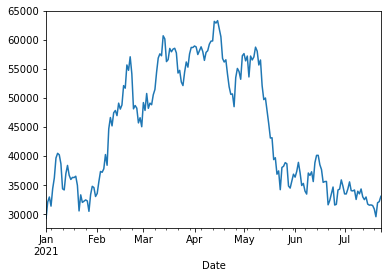

In [4]:
df["Closing Price (USD)"].plot()

<AxesSubplot:xlabel='Date'>

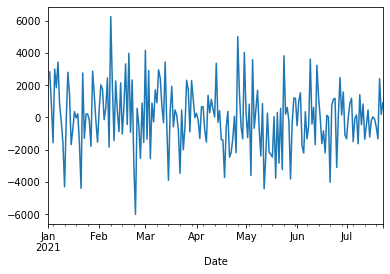

In [5]:
# Differencing the Settle price stationarizes the time series
df["Closing Price (USD)"].diff().plot()

# Autocorrelation and Partial Autocorrelation Analysis

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

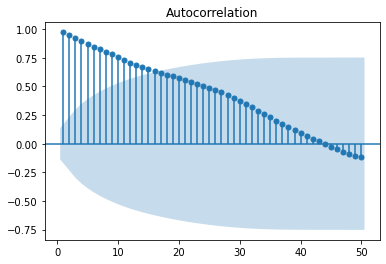

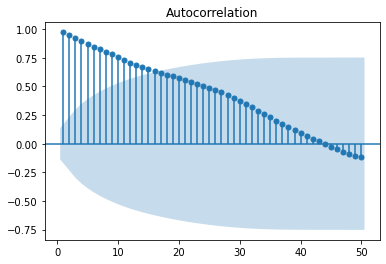

In [7]:
# Plot the autocorrelation of the Closing Prices
plot_acf(df["Closing Price (USD)"], zero=False, lags=50)

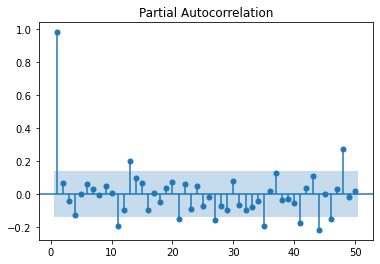

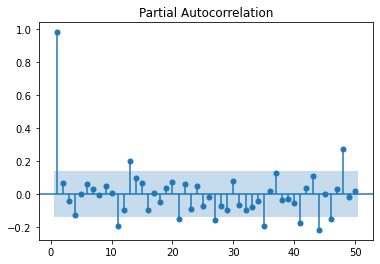

In [8]:
# Plot the partial autocorrelation of the returns
plot_pacf(df["Closing Price (USD)"], zero=False, lags=50)

# ARIMA Model

In [9]:
from statsmodels.tsa.arima_model import ARIMA

In [10]:
# Create an ARIMA model
model = ARIMA(df["Closing Price (USD)"].values, order=(17, 1, 0))

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [11]:
# Fit the model to the data
results = model.fit()

In [12]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  203
Model:                ARIMA(17, 1, 0)   Log Likelihood               -1816.226
Method:                       css-mle   S.D. of innovations           1855.294
Date:                Tue, 03 Aug 2021   AIC                           3670.453
Time:                        20:27:38   BIC                           3733.404
Sample:                             1   HQIC                          3695.920
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1770    121.991      0.092      0.927    -227.921     250.275
ar.L1.D.y     -0.0658      0.070     -0.936      0.349      -0.203       0.072
ar.L2.D.y      0.0704      0.070      1.003      0.316      -0.067       0.208
ar.L3.D.y      0.0847      0.071      1.196      0.232      -0.054       0.223
ar.L4.D.y      0.0386      0.071      0.542      0.588      -0.101       0.178
ar.L5.D.y     -0.0191      0.071     -0.269      0.788      -0.158       0.120
ar.L6.D.y      0.0201      0.071      0.283      0.777      -0.119       0.160
ar.L7.D.y     -0.0338      0.071     -0.478      0.633      -0.173       0.105
ar.L8.D.y     -0.0974      0.069     -1.404      0.160      -0.233       0.039
ar.L9.D.y     -0.0166      0.070     -0.238      0.812      -0.153       0.120
ar.L10.D.y     0.1438      0.071      2.039      0.041       0.006       0.282
ar.L11.D.y     0.0801      0.071      1.127      0.260      -0.059       0.219
ar.L12.D.y    -0.1337      0.072     -1.860      0.063      -0.275       0.007
ar.L13.D.y    -0.0582      0.073     -0.799      0.425      -0.201       0.085
ar.L14.D.y    -0.1240      0.073     -1.703      0.088      -0.267       0.019
ar.L15.D.y    -0.0235      0.073     -0.321      0.748      -0.167       0.120
ar.L16.D.y    -0.0056      0.073     -0.078      0.938      -0.148       0.137
ar.L17.D.y     0.0609      0.072      0.844      0.399      -0.081       0.202
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0821           -0.2299j            1.1062           -0.4667
AR.2            -1.0821           +0.2299j            1.1062            0.4667
AR.3            -0.9518           -0.7171j            1.1917           -0.3972
AR.4            -0.9518           +0.7171j            1.1917            0.3972
AR.5            -0.8321           -0.9734j            1.2806           -0.3626
AR.6            -0.8321           +0.9734j            1.2806            0.3626
AR.7            -0.3356           -1.0562j            1.1083           -0.2990
AR.8            -0.3356           +1.0562j            1.1083            0.2990
AR.9             0.1007           -1.2790j            1.2829           -0.2375
AR.10            0.1007           +1.2790j            1.2829            0.2375
AR.11            0.4127           -1.0125j            1.0934           -0.1884
AR.12            0.4127           +1.0125j            1.0934            0.1884
AR.13            0.8582           -0.6808j            1.0954           -0.1067
AR.14            0.8582           +0.6808j            1.0954            0.1067
AR.15            1.0954           -0.2706j            1.1283           -0.0385
AR.16            1.0954           +0.2706j            1.1283            0.0385
AR

<AxesSubplot:title={'center':'Futures Forecast'}>

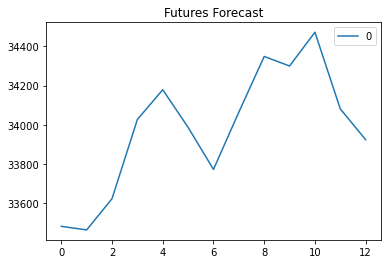

In [13]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=13)[0]).plot(title="Futures Forecast")

In [14]:
# save model
results.save('btc_model1.pkl')

# ARIMA Model using a Lag of 2

In [31]:
# Create an ARIMA Model and fit it to the data
model2 = ARIMA(df["Closing Price (USD)"].values, order=(10, 1, 1))
results2 = model2.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mode

In [32]:
# print the model summary
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  203
Model:                ARIMA(10, 1, 1)   Log Likelihood               -1820.676
Method:                       css-mle   S.D. of innovations           1899.329
Date:                Tue, 03 Aug 2021   AIC                           3667.351
Time:                        20:29:01   BIC                           3710.423
Sample:                             1   HQIC                          3684.776
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5387    151.369      0.122      0.903    -278.139     315.217
ar.L1.D.y      0.1148      0.296      0.388      0.698      -0.465       0.694
ar.L2.D.y      0.0781      0.072      1.088      0.277      -0.063       0.219
ar.L3.D.y      0.0517      0.072      0.717      0.473      -0.090       0.193
ar.L4.D.y      0.0253      0.073      0.348      0.728      -0.117       0.168
ar.L5.D.y     -0.0249      0.071     -0.350      0.727      -0.165       0.115
ar.L6.D.y      0.0356      0.071      0.499      0.618      -0.104       0.175
ar.L7.D.y     -0.0188      0.072     -0.263      0.793      -0.159       0.122
ar.L8.D.y     -0.1019      0.071     -1.445      0.148      -0.240       0.036
ar.L9.D.y     -0.0137      0.076     -0.181      0.856      -0.162       0.135
ar.L10.D.y     0.1244      0.071      1.744      0.081      -0.015       0.264
ma.L1.D.y     -0.1700      0.292     -0.583      0.560      -0.741       0.401
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.2763           -0.0000j            1.2763           -0.0000
AR.2             1.0748           -0.6228j            1.2422           -0.0836
AR.3             1.0748           +0.6228j            1.2422            0.0836
AR.4             0.4215           -1.1172j            1.1941           -0.1926
AR.5             0.4215           +1.1172j            1.1941            0.1926
AR.6            -0.3923           -1.1134j            1.1805           -0.3039
AR.7            -0.3923           +1.1134j            1.1805            0.3039
AR.8            -1.0554           -0.7155j            1.2751           -0.4052
AR.9            -1.0554           +0.7155j            1.2751            0.4052
AR.10           -1.2632           -0.0000j            1.2632           -0.5000
MA.1             5.8825           +0.0000j            5.8825            0.0000
------------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

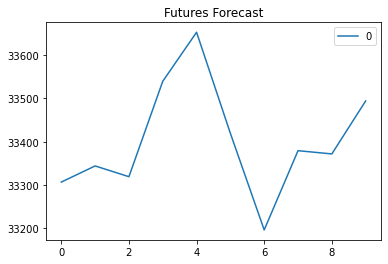

In [33]:
# Plot the Futures Price Forecast
pd.DataFrame(results2.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [34]:
# save model
results2.save('btc_model2.pkl')